In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/AI_Principles_Project/Text to Speech"

/content/drive/.shortcut-targets-by-id/1kM_gZmgx4Zq_-A_0EWkezUqJ4ftxX73n/AI_Principles_Project/Text to Speech


In [3]:
import pickle
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [4]:
cti = "/content/drive/MyDrive/AI_Principles_Project/Text to Speech/Transformer-Text-To-Speech/input/char_to_idx.pickle"

In [5]:
import pickle

# Replace 'yourfile.pkl' with the path to your pickle file
with open(cti, 'rb') as file:
    cti_dict = pickle.load(file)

# Now 'data' contains the object that was stored in the pickle file
print(cti_dict)

{' ': 1, "'": 29, ',': 28, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, '.': 30}


In [6]:
itc = "/content/drive/MyDrive/AI_Principles_Project/Text to Speech/Transformer-Text-To-Speech/input/idx_to_char.pickle"
# Replace 'yourfile.pkl' with the path to your pickle file
with open(itc, 'rb') as file:
    itc_dict = pickle.load(file)

# Now 'data' contains the object that was stored in the pickle file
print(itc_dict)

{0: "'", 1: '<SPACE>', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: 'g', 9: 'h', 10: 'i', 11: 'j', 12: 'k', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'w', 25: 'x', 26: 'y', 27: 'z'}


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset, Audio
import librosa

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
stream_data = load_dataset("mozilla-foundation/common_voice_13_0", "sw", split="test", streaming=True)
stream_data = stream_data.cast_column("audio", Audio(sampling_rate=48_000))
en_sample = next(iter(stream_data))["audio"]["array"]
# samples = stream_data.cast_column("audio", Audio(sampling_rate=16000))

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Reading metadata...: 11271it [00:00, 19073.49it/s]


In [ ]:
# Iterate through the dataset
needed_idx=0
for idx,sample in enumerate(stream_data):
    if idx == needed_idx:
      # Here you can process each sample. For example, printing the sample.
      # print(sample['audio']['array'].shape) #['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant']
      sample_rate = sample['audio']['sampling_rate']
      signal = sample['audio']['array']
      duration = librosa.get_duration(y=signal, sr=sample_rate)
      print(sample_rate)
      print()
      break

Reading metadata...: 11271it [00:00, 56184.66it/s]


48000



In [ ]:
sample['sentence']

'wachambuzi wa soka wanamtaja Messi kama nyota hatari zaidi duniani'

In [ ]:
number_of_audios=32
texts_array = np.ones(number_of_audios).astype(('U', 100000))
texts_array

array(['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0',
       '1.0', '1.0', '1.0', '1.0', '1.0'], dtype='<U100000')

In [ ]:
# Assuming you have an IterableDataset loaded as 'dataset'
for idx,sample in enumerate(stream_data):
    audio_data = sample['audio']['array']
    # client_id = sample['client_id']
    sentence = f"{idx}|{sample['sentence']}"
    texts_array[idx]=sentence
    # Save each audio sample as a WAV file
    file_name = f"/content/drive/MyDrive/AI_Principles_Project/Text to Speech/Transformer-Text-To-Speech/input/LJSpeech-1.1/wavs/{idx}.wav"
    wavfile.write(file_name, 48000, audio_data.astype(np.float32))
    if idx==number_of_audios-1:
      break

Reading metadata...: 11271it [00:00, 54088.87it/s]


In [ ]:
texts_array

array(['0|wachambuzi wa soka wanamtaja Messi kama nyota hatari zaidi duniani',
       '1|romario aliingia kwenye orodha ya wachezaji waliyofanya vizuri kwenye michuano',
       '2|Sote twesangaa twelipomuona mwalimu Ali apika',
       '3|Inajulikana kama shina la Warangi.',
       '4|ni kikwazo kikubwa katika maendeleo ya afrika',
       '5|alikamatwa katika wilaya ya mkono kwa sasa',
       '6|hebu tega sikio wimbo huu mzuri wa tony joel',
       '7|mbele ya sanamu tukufu ya Kaisari',
       '8|katika mambo yote Hivyo polepole wenyeji walianza kutumia lugha',
       '9|elfu mbili na tano chini ya rais mstaafu hayati Benjamin MkapaMajaliwa alikuwa Waziri',
       '10|Mwidhi aliyejepa simu amekatiwa kifungo cha mwaka mmoya',
       '11|Serikali za Tanzania na Kenya hutunza idadi kadhaa ya maeneo yaliyotengwa',
       '12|Hasa aliandika riwaya na mashairi.',
       '13|Miaka mitatu ijayo ntakuwa nimemaliza',
       '14|Hachufungi idirisha la mwisho.',
       '15|zinakumbuka wamisionari k

In [ ]:
# Open the file in append mode ('a') or write mode ('w')
with open('/content/drive/MyDrive/AI_Principles_Project/Text to Speech/Transformer-Text-To-Speech/input/LJSpeech-1.1/metadata.csv', 'w') as file:
    for i in texts_array:
      file.writelines(i+'\n')

In [7]:
%cd "/content/drive/MyDrive/AI_Principles_Project/Text to Speech/Transformer-Text-To-Speech"
!python "/content/drive/MyDrive/AI_Principles_Project/Text to Speech/Transformer-Text-To-Speech/train.py"

/content/drive/.shortcut-targets-by-id/1kM_gZmgx4Zq_-A_0EWkezUqJ4ftxX73n/AI_Principles_Project/Text to Speech/Transformer-Text-To-Speech
--------- [INFO] STARTING TRAINING ---------

100% 4/4 [00:04<00:00,  1.23s/it]
100% 1/1 [00:01<00:00,  1.17s/it]
EPOCH -> 1/250 | TRAIN LOSS = 2.5909388065338135 | VAL LOSS = 3.3895931243896484 | LR = 5.999999999999999e-06 

100% 4/4 [00:02<00:00,  1.90it/s]
100% 1/1 [00:00<00:00,  2.17it/s]
EPOCH -> 2/250 | TRAIN LOSS = 2.5170481503009796 | VAL LOSS = 3.240825891494751 | LR = 1.1999999999999999e-05 

100% 4/4 [00:02<00:00,  1.52it/s]
100% 1/1 [00:00<00:00,  1.53it/s]
EPOCH -> 3/250 | TRAIN LOSS = 2.368220776319504 | VAL LOSS = 3.074385404586792 | LR = 1.7999999999999997e-05 

100% 4/4 [00:02<00:00,  1.62it/s]
100% 1/1 [00:00<00:00,  2.16it/s]
EPOCH -> 4/250 | TRAIN LOSS = 2.1950859427452087 | VAL LOSS = 2.913245916366577 | LR = 2.3999999999999997e-05 

100% 4/4 [00:02<00:00,  1.94it/s]
100% 1/1 [00:00<00:00,  2.24it/s]
EPOCH -> 5/250 | TRAIN LOSS = 

Text(0.5, 1.0, 'Loss curve for Swahili TTS model')

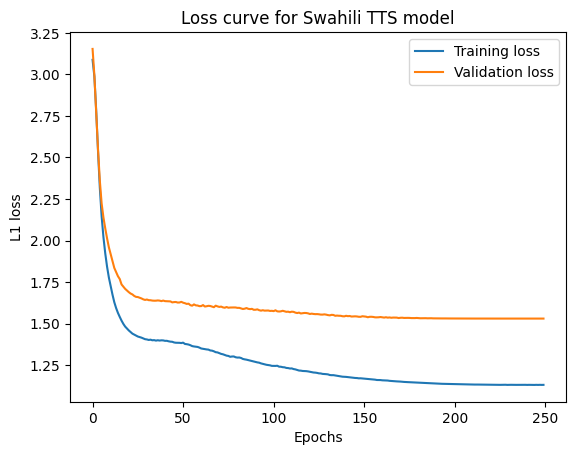

In [ ]:
import matplotlib.pyplot as plt
losses = np.loadtxt("losses.txt")
plt.plot(losses[:,0],label = "Training loss")
plt.plot(losses[:,1],label = "Validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("L1 loss")
plt.title("Loss curve for Swahili TTS model")

In [ ]:
import torch

In [ ]:
if not False:
  print("here")

here


In [ ]:
# def inference_fn(model, data, device):
#     if os.path.exists(config.checkpoint):
#         checkpoint = torch.load(config.checkpoint)
#         model.load_state_dict(checkpoint['model_state_dict'])
#         print("model checkpoint loaded.")
#         print(model.shape)
#     running_loss = 0
#     model.eval()
#     end_logits = data['end_logits'].to(device)
#     print(end_logits.shape)
#     mel_spect = data['mel_spect'].to(device)
#     text_idx = data['text_idx'].to(device)
#     text = data['original_text']
#     mel_mask = data['mel_mask'].to(device)
#     mel_spect_post_pred, mel_spect_pred, end_logits_pred = model(text_idx, mel_spect[:, :-1], mel_mask[:, :-1])
#     for _ in range(100):
#       mel_mask = torch.tensor([1]*mel_spect_pred.shape[0], dtype=torch.long).to(device)
#       mel_spect_post_pred, mel_spect_pred, end_logits_pred = model(text_idx, mel_spect_pred, mel_mask[:, :-1])
#     audio_signal = librosa.feature.inverse.mel_to_audio(
#     mel_spect_pred,
#     sr=config.sample_rate,
#     n_fft=config.win_length,
#     hop_length=config.hop_length,
#     win_length=config.win_length,
#     window='hann'
#     )
#     wavfile.write("inference.wav", 48000, audio_signal.astype(np.float32))
#     return audio_signal

In [ ]:
# array(['0|wachambuzi wa soka wanamtaja Messi kama nyota hatari zaidi duniani',
#        '1|romario aliingia kwenye orodha ya wachezaji waliyofanya vizuri kwenye michuano',
#        '2|Sote twesangaa twelipomuona mwalimu Ali apika',
#        '3|Inajulikana kama shina la Warangi.',
#        '4|ni kikwazo kikubwa katika maendeleo ya afrika',
#        '5|alikamatwa katika wilaya ya mkono kwa sasa',

In [ ]:
!python predict_cascaded.py "romario aliingia kwenye orodha ya wachezaji waliyofanya vizuri kwenye michuano"

Input text: romario aliingia kwenye orodha ya wachezaji waliyofanya vizuri kwenye michuano
mel_spect[:, :-1]: torch.Size([1, 1, 80])
100% 240/240 [00:09<00:00, 25.04it/s]
mel_spect.shape: torch.Size([1, 242, 80])
audio_signal: [ 0.00000000e+00 -8.08790261e-08 -1.12140117e-06 ... -6.92743361e-02
  2.46181399e-01  1.22159205e-01]
audio_signal.shape: (48200,)


In [ ]:
import config
import librosa
from librosa.feature import melspectrogram
audio_file, _ = librosa.load(
            "/content/drive/MyDrive/AI_Principles_Project/Text to Speech/Transformer-Text-To-Speech/input/LJSpeech-1.1/wavs/1.wav",
            sr=config.sample_rate
            )

audio_file, _ = librosa.effects.trim(audio_file)

mel_spect = melspectrogram(
    y=audio_file,
    sr=config.sample_rate,
    n_mels=config.n_mels,
    hop_length=config.hop_length,
    win_length=config.win_length
)
pre_mel_spect = np.zeros((1, config.n_mels))
mel_spect = (mel_spect).T #librosa.power_to_db(mel_spect).T
mel_spect = np.concatenate((pre_mel_spect, mel_spect), axis=0)



In [ ]:
audio_file.shape

(69120,)

In [ ]:
mel_spect.shape

(347, 80)

In [ ]:
audio_signal = librosa.feature.inverse.mel_to_audio(
mel_spect.T,
sr=config.sample_rate,
n_fft=config.win_length,
hop_length=config.hop_length,
win_length=config.win_length,
window='hann'
)

In [ ]:
audio_signal.shape

(69200,)

In [ ]:
wavfile.write("inference_fake.wav", config.sample_rate, audio_signal)
